In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as Scipy
from IPython.display import display
from io import StringIO
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
mba = pd.read_excel(r'mba.xlsx')

In [4]:
mba

BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                      Date  Price  CustomerID         Country  
0      2010-12-01 08:26:00   2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00   2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
...                    ...    ...         ...             ...  
522059 2011-12-09 12:50:00   0.85     12680.0          France  
522060 2011-12-09 12:50:00   2.10     12680.0          France  
522061 2011-12-09 12:50:00   4.15     12680.0          France  
522062 2011-12-09 12:50:00   4.15     12680.0          France  
522063 2011-12-09 12:50:00   4.95     12680.0          France  

[522064 rows x 7 columns]

In [5]:
mba.head()

BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom

In [6]:
mba.tail()

BillNo                         Itemname  Quantity                Date  \
522059  581587      PACK OF 20 SPACEBOY NAPKINS        12 2011-12-09 12:50:00   
522060  581587      CHILDREN'S APRON DOLLY GIRL         6 2011-12-09 12:50:00   
522061  581587     CHILDRENS CUTLERY DOLLY GIRL         4 2011-12-09 12:50:00   
522062  581587  CHILDRENS CUTLERY CIRCUS PARADE         4 2011-12-09 12:50:00   
522063  581587     BAKING SET 9 PIECE RETROSPOT         3 2011-12-09 12:50:00   

        Price  CustomerID Country  
522059   0.85     12680.0  France  
522060   2.10     12680.0  France  
522061   4.15     12680.0  France  
522062   4.15     12680.0  France  
522063   4.95     12680.0  France

In [7]:
mba.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [8]:
mba.shape

(522064, 7)

In [9]:
mba.dtypes

BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object

In [10]:
print("Original Column Names:", mba.columns)

Original Column Names: Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')


In [11]:
mba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [12]:
mba.describe()

Quantity                           Date          Price  \
count  522064.000000                         522064  522064.000000   
mean       10.090435  2011-07-04 12:51:20.777107456       3.826801   
min     -9600.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:15:00       1.250000   
50%         3.000000            2011-07-20 08:59:00       2.080000   
75%        10.000000            2011-10-19 14:12:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   13541.330000   
std       161.110525                            NaN      41.900599   

          CustomerID  
count  388023.000000  
mean    15316.931710  
min     12346.000000  
25%     13950.000000  
50%     15265.000000  
75%     16837.000000  
max     18287.000000  
std      1721.846964

In [13]:
nan_values = mba.isna()
print(nan_values)
nan_count = mba.isna().sum()
print(nan_count)

        BillNo  Itemname  Quantity   Date  Price  CustomerID  Country
0        False     False     False  False  False       False    False
1        False     False     False  False  False       False    False
2        False     False     False  False  False       False    False
3        False     False     False  False  False       False    False
4        False     False     False  False  False       False    False
...        ...       ...       ...    ...    ...         ...      ...
522059   False     False     False  False  False       False    False
522060   False     False     False  False  False       False    False
522061   False     False     False  False  False       False    False
522062   False     False     False  False  False       False    False
522063   False     False     False  False  False       False    False

[522064 rows x 7 columns]
BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country

In [14]:
mba_cleaned_rows = mba.dropna()

In [15]:
mba_cleaned_rows

BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                      Date  Price  CustomerID         Country  
0      2010-12-01 08:26:00   2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00   2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
...                    ...    ...         ...             ...  
522059 2011-12-09 12:50:00   0.85     12680.0          France  
522060 2011-12-09 12:50:00   2.10     12680.0          France  
522061 2011-12-09 12:50:00   4.15     12680.0          France  
522062 2011-12-09 12:50:00   4.15     12680.0          France  
522063 2011-12-09 12:50:00   4.95     12680.0          France  

[388023 rows x 7 columns]

In [16]:
nan_values = mba_cleaned_rows.isna()
print(nan_values)
nan_count = mba_cleaned_rows.isna().sum()
print(nan_count)

        BillNo  Itemname  Quantity   Date  Price  CustomerID  Country
0        False     False     False  False  False       False    False
1        False     False     False  False  False       False    False
2        False     False     False  False  False       False    False
3        False     False     False  False  False       False    False
4        False     False     False  False  False       False    False
...        ...       ...       ...    ...    ...         ...      ...
522059   False     False     False  False  False       False    False
522060   False     False     False  False  False       False    False
522061   False     False     False  False  False       False    False
522062   False     False     False  False  False       False    False
522063   False     False     False  False  False       False    False

[388023 rows x 7 columns]
BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64


In [19]:
mba1 = mba_cleaned_rows
mba1.describe()

Quantity                           Date          Price  \
count  388023.000000                         388023  388023.000000   
mean       12.892140  2011-07-10 21:25:52.408594176       3.079258   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 10:54:00       1.250000   
50%         5.000000            2011-07-31 13:36:00       1.950000   
75%        12.000000            2011-10-21 09:56:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       182.605318                            NaN      21.984569   

          CustomerID  
count  388023.000000  
mean    15316.931710  
min     12346.000000  
25%     13950.000000  
50%     15265.000000  
75%     16837.000000  
max     18287.000000  
std      1721.846964

In [20]:
mba1

BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                      Date  Price  CustomerID         Country  
0      2010-12-01 08:26:00   2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00   2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
...                    ...    ...         ...             ...  
522059 2011-12-09 12:50:00   0.85     12680.0          France  
522060 2011-12-09 12:50:00   2.10     12680.0          France  
522061 2011-12-09 12:50:00   4.15     12680.0          France  
522062 2011-12-09 12:50:00   4.15     12680.0          France  
522063 2011-12-09 12:50:00   4.95     12680.0          France  

[388023 rows x 7 columns]

In [22]:
mba1.shape

(388023, 7)

In [28]:
mba1.duplicated().sum()

5212

In [29]:
mba1.drop_duplicates(inplace=True)

In [31]:
mba1.shape

(382811, 7)

In [33]:
mba1.describe()

Quantity                           Date          Price  \
count  382811.000000                         382811  382811.000000   
mean       13.026060  2011-07-10 17:05:21.125881856       3.088636   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       183.823585                            NaN      22.132049   

          CustomerID  
count  382811.000000  
mean    15310.347702  
min     12346.000000  
25%     13928.500000  
50%     15249.000000  
75%     16820.000000  
max     18287.000000  
std      1722.483516

In [37]:
mba1['Itemname'] = mba1['Itemname'].str.strip()

In [38]:
mba1

BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                      Date  Price  CustomerID         Country  
0      2010-12-01 08:26:00   2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00   2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
...                    ...    ...         ...             ...  
522059 2011-12-09 12:50:00   0.85     12680.0          France  
522060 2011-12-09 12:50:00   2.10     12680.0          France  
522061 2011-12-09 12:50:00   4.15     12680.0          France  
522062 2011-12-09 12:50:00   4.15     12680.0          France  
522063 2011-12-09 12:50:00   4.95     12680.0          France  

[382811 rows x 7 columns]

In [43]:
item_counts = mba1['Itemname'].value_counts()

In [44]:
item_counts

Itemname
WHITE HANGING HEART T-LIGHT HOLDER    1964
REGENCY CAKESTAND 3 TIER              1634
JUMBO BAG RED RETROSPOT               1588
ASSORTED COLOUR BIRD ORNAMENT         1378
PARTY BUNTING                         1362
                                      ... 
72 CAKE CASES VINTAGE CHRISTMAS          1
WRAP BLUE RUSSIAN FOLKART                1
DUSTY PINK CHRISTMAS TREE 30CM           1
BLACKCHRISTMAS TREE 30CM                 1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 3846, dtype: int64

In [45]:
item_counts.shape

(3846,)

In [46]:
transaction_data = mba1.groupby(['BillNo', 'Date'])['Itemname'].apply(lambda x: ', '.join(x)).reset_index()

In [49]:
transaction_data

BillNo                Date  \
0      536365 2010-12-01 08:26:00   
1      536366 2010-12-01 08:28:00   
2      536367 2010-12-01 08:34:00   
3      536368 2010-12-01 08:34:00   
4      536369 2010-12-01 08:35:00   
...       ...                 ...   
18187  581583 2011-12-09 12:23:00   
18188  581584 2011-12-09 12:25:00   
18189  581585 2011-12-09 12:31:00   
18190  581586 2011-12-09 12:49:00   
18191  581587 2011-12-09 12:50:00   

                                                Itemname  
0      WHITE HANGING HEART T-LIGHT HOLDER, WHITE META...  
1      HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT  
2      ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU...  
3      JAM MAKING SET WITH JARS, RED COAT RACK PARIS ...  
4                               BATH BUILDING BLOCK WORD  
...                                                  ...  
18187  LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEAR...  
18188  RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE ...  
18189  BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTTL...  
18190  LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3 ...  
18191  CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRCU...  

[18192 rows x 3 columns]

In [48]:
columns_to_drop = ['BillNo', 'Date']

In [50]:
transaction_data.drop(columns=columns_to_drop, inplace=True)

In [51]:
transaction_data_path = 'transaction_data_path.csv'

In [52]:
transaction_data.to_csv(transaction_data_path, index=False)

In [53]:
print("\nTransaction Data for Association Rule Mining:")


Transaction Data for Association Rule Mining:


In [54]:
print(transaction_data.head())
transaction_data.shape

                                            Itemname
0  WHITE HANGING HEART T-LIGHT HOLDER, WHITE META...
1  HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT
2  ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU...
3  JAM MAKING SET WITH JARS, RED COAT RACK PARIS ...
4                           BATH BUILDING BLOCK WORD


(18192, 1)

In [55]:
items_df = transaction_data['Itemname'].str.split(', ', expand=True)

In [56]:
items_df

0                                 1    \
0       WHITE HANGING HEART T-LIGHT HOLDER               WHITE METAL LANTERN   
1                   HAND WARMER UNION JACK         HAND WARMER RED POLKA DOT   
2            ASSORTED COLOUR BIRD ORNAMENT         POPPY'S PLAYHOUSE BEDROOM   
3                 JAM MAKING SET WITH JARS       RED COAT RACK PARIS FASHION   
4                 BATH BUILDING BLOCK WORD                              None   
...                                    ...                               ...   
18187              LUNCH BAG RED RETROSPOT   6 CHOCOLATE LOVE HEART T-LIGHTS   
18188     RED FLOCK LOVE HEART PHOTO FRAME   6 CHOCOLATE LOVE HEART T-LIGHTS   
18189       BLACK TEA TOWEL CLASSIC DESIGN      ASSORTED BOTTLE TOP  MAGNETS   
18190  LARGE CAKE STAND  HANGING STRAWBERY  SET OF 3 HANGING OWLS OLLIE BEAK   
18191              CIRCUS PARADE LUNCH BOX     PLASTERS IN TIN CIRCUS PARADE   

                                   2                                    3    \
0       CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                                 None                                 None   
2            POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3       YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                                 None                                 None   
...                                ...                                  ...   
18187                             None                                 None   
18188                             None                                 None   
18189  VICTORIAN GLASS HANGING T-LIGHT       EMBOSSED GLASS TEALIGHT HOLDER   
18190    RED RETROSPOT ROUND CAKE TINS                DOORMAT RED RETROSPOT   
18191        PLASTERS IN TIN STRONGMAN            ALARM CLOCK BAKELIKE PINK   

                                    4                                   5    \
0        RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTING BOXES   
1                                  None                                None   
2                IVORY KNITTED MUG COSY  BOX OF 6 ASSORTED COLOUR TEASPOONS   
3                                  None                                None   
4                                  None                                None   
...                                 ...                                 ...   
18187                              None                                None   
18188                              None                                None   
18189  ZINC WILLIE WINKIE  CANDLE STICK                  RABBIT NIGHT LIGHT   
18190                              None                                None   
18191          ALARM CLOCK BAKELIKE RED          ALARM CLOCK BAKELIKE GREEN   

                                     6                                   7    \
0      GLASS STAR FROSTED T-LIGHT HOLDER                                None   
1                                   None                                None   
2           BOX OF VINTAGE JIGSAW BLOCKS      BOX OF VINTAGE ALPHABET BLOCKS   
3                                   None                                None   
4                                   None                                None   
...                                  ...                                 ...   
18187                               None                                None   
18188                               None                                None   
18189      ASSORTED COLOUR BIRD ORNAMENT  MULTI COLOUR SILVER T-LIGHT HOLDER   
18190                               None                                None   
18191         ALARM CLOCK BAKELIKE IVORY     CHILDRENS APRON SPACEBOY DESIGN   

                               8                           9    \
0                             None                        None   
1                             None                        None   
2         HOME BUILDI

In [57]:
transaction_data = pd.concat([transaction_data, items_df], axis=1)

In [58]:
transaction_data

Itemname  \
0      WHITE HANGING HEART T-LIGHT HOLDER, WHITE META...   
1      HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT   
2      ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU...   
3      JAM MAKING SET WITH JARS, RED COAT RACK PARIS ...   
4                               BATH BUILDING BLOCK WORD   
...                                                  ...   
18187  LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEAR...   
18188  RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE ...   
18189  BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTTL...   
18190  LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3 ...   
18191  CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRCU...   

                                         0                                 1  \
0       WHITE HANGING HEART T-LIGHT HOLDER               WHITE METAL LANTERN   
1                   HAND WARMER UNION JACK         HAND WARMER RED POLKA DOT   
2            ASSORTED COLOUR BIRD ORNAMENT         POPPY'S PLAYHOUSE BEDROOM   
3                 JAM MAKING SET WITH JARS       RED COAT RACK PARIS FASHION   
4                 BATH BUILDING BLOCK WORD                              None   
...                                    ...                               ...   
18187              LUNCH BAG RED RETROSPOT   6 CHOCOLATE LOVE HEART T-LIGHTS   
18188     RED FLOCK LOVE HEART PHOTO FRAME   6 CHOCOLATE LOVE HEART T-LIGHTS   
18189       BLACK TEA TOWEL CLASSIC DESIGN      ASSORTED BOTTLE TOP  MAGNETS   
18190  LARGE CAKE STAND  HANGING STRAWBERY  SET OF 3 HANGING OWLS OLLIE BEAK   
18191              CIRCUS PARADE LUNCH BOX     PLASTERS IN TIN CIRCUS PARADE   

                                     2                                    3  \
0       CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                                 None                                 None   
2            POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3       YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                                 None                                 None   
...                                ...                                  ...   
18187                             None                                 None   
18188                             None                                 None   
18189  VICTORIAN GLASS HANGING T-LIGHT       EMBOSSED GLASS TEALIGHT HOLDER   
18190    RED RETROSPOT ROUND CAKE TINS                DOORMAT RED RETROSPOT   
18191        PLASTERS IN TIN STRONGMAN            ALARM CLOCK BAKELIKE PINK   

                                      4                                   5  \
0        RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTING BOXES   
1                                  None                                None   
2                IVORY KNITTED MUG COSY  BOX OF 6 ASSORTED COLOUR TEASPOONS   
3                                  None                                None   
4                                  None                                None   
...                                 ...                                 ...   
18187                              None                                None   
18188                              None                                None   
18189  ZINC WILLIE WINKIE  CANDLE STICK                  RABBIT NIGHT LIGHT   
18190                              None                                None   
18191          ALARM CLOCK BAKELIKE RED          ALARM CLOCK BAKELIKE GREEN   

                                       6                                   7  \
0      GLASS STAR FROSTED T-LIGHT HOLDER                                None   
1                                   None                                None   
2           BOX OF VINTAGE JIGSAW BLOCKS      BOX OF VINTAGE ALPHABET BLOCKS   
3                                   None                                None   
4                                   None                            

In [59]:
transaction_data = transaction_data.drop('Itemname', axis=1)

In [60]:
transaction_data

0                                 1  \
0       WHITE HANGING HEART T-LIGHT HOLDER               WHITE METAL LANTERN   
1                   HAND WARMER UNION JACK         HAND WARMER RED POLKA DOT   
2            ASSORTED COLOUR BIRD ORNAMENT         POPPY'S PLAYHOUSE BEDROOM   
3                 JAM MAKING SET WITH JARS       RED COAT RACK PARIS FASHION   
4                 BATH BUILDING BLOCK WORD                              None   
...                                    ...                               ...   
18187              LUNCH BAG RED RETROSPOT   6 CHOCOLATE LOVE HEART T-LIGHTS   
18188     RED FLOCK LOVE HEART PHOTO FRAME   6 CHOCOLATE LOVE HEART T-LIGHTS   
18189       BLACK TEA TOWEL CLASSIC DESIGN      ASSORTED BOTTLE TOP  MAGNETS   
18190  LARGE CAKE STAND  HANGING STRAWBERY  SET OF 3 HANGING OWLS OLLIE BEAK   
18191              CIRCUS PARADE LUNCH BOX     PLASTERS IN TIN CIRCUS PARADE   

                                     2                                    3  \
0       CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                                 None                                 None   
2            POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3       YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                                 None                                 None   
...                                ...                                  ...   
18187                             None                                 None   
18188                             None                                 None   
18189  VICTORIAN GLASS HANGING T-LIGHT       EMBOSSED GLASS TEALIGHT HOLDER   
18190    RED RETROSPOT ROUND CAKE TINS                DOORMAT RED RETROSPOT   
18191        PLASTERS IN TIN STRONGMAN            ALARM CLOCK BAKELIKE PINK   

                                      4                                   5  \
0        RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTING BOXES   
1                                  None                                None   
2                IVORY KNITTED MUG COSY  BOX OF 6 ASSORTED COLOUR TEASPOONS   
3                                  None                                None   
4                                  None                                None   
...                                 ...                                 ...   
18187                              None                                None   
18188                              None                                None   
18189  ZINC WILLIE WINKIE  CANDLE STICK                  RABBIT NIGHT LIGHT   
18190                              None                                None   
18191          ALARM CLOCK BAKELIKE RED          ALARM CLOCK BAKELIKE GREEN   

                                       6                                   7  \
0      GLASS STAR FROSTED T-LIGHT HOLDER                                None   
1                                   None                                None   
2           BOX OF VINTAGE JIGSAW BLOCKS      BOX OF VINTAGE ALPHABET BLOCKS   
3                                   None                                None   
4                                   None                                None   
...                                  ...                                 ...   
18187                               None                                None   
18188                               None                                None   
18189      ASSORTED COLOUR BIRD ORNAMENT  MULTI COLOUR SILVER T-LIGHT HOLDER   
18190                               None                                None   
18191         ALARM CLOCK BAKELIKE IVORY     CHILDRENS APRON SPACEBOY DESIGN   

                                 8                           9  \
0                             None                        None   
1                             None                        None   
2         HOME BUILDING

In [61]:
print(transaction_data.head())

                                    0                            1  \
0  WHITE HANGING HEART T-LIGHT HOLDER          WHITE METAL LANTERN   
1              HAND WARMER UNION JACK    HAND WARMER RED POLKA DOT   
2       ASSORTED COLOUR BIRD ORNAMENT    POPPY'S PLAYHOUSE BEDROOM   
3            JAM MAKING SET WITH JARS  RED COAT RACK PARIS FASHION   
4            BATH BUILDING BLOCK WORD                         None   

                                2                                    3  \
0  CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                            None                                 None   
2       POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3  YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                            None                                 None   

                                4                                   5  \
0  RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTI

In [62]:
#Association Rules - Data Mining

In [100]:
df_encoded = pd.get_dummies(transaction_data, prefix='', prefix_sep='').groupby(level=0, axis=1).max()

In [101]:
df_encoded

1 HANGER ,MAGIC GARDEN  10 COLOUR SPACEBOY PEN  \
0                       False                   False   
1                       False                   False   
2                       False                   False   
3                       False                   False   
4                       False                   False   
...                       ...                     ...   
18187                   False                   False   
18188                   False                   False   
18189                   False                   False   
18190                   False                   False   
18191                   False                   False   

       12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
18187                       False                      False   
18188                       False                      False   
18189                       False                      False   
18190                       False                      False   
18191                       False                      False   

       12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  \
0                          False                         False   
1                          False                         False   
2                          False                         False   
3                          False                         False   
4                          False                         False   
...                          ...                           ...   
18187                      False                         False   
18188                      False                         False   
18189                      False                         False   
18190                      False                         False   
18191                      False                         False   

       12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
0                                 False                            False   
1                                 False                            False   
2                                 False                            False   
3                                 False                            False   
4                                 False                            False   
...                                 ...                              ...   
18187                             False                            False   
18188                             False                            False   
18189                             False                            False   
18190                             False                            False   
18191                             False                            False   

       12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
0                              False                                False   
1                              False                                False   
2                              False                                False   
3                              False                                False   
4                              False                                False   
...                              ...                                  ...   
18187                          False                                False   
18188                          False                                False   
18189                          False                                False   
18190                          False                                False   


In [66]:
df_encoded.to_csv('transaction_data_encoded.csv', index=False)

In [67]:
#Association Rule Mining

In [68]:
df_encoded = pd.read_csv('transaction_data_encoded.csv')

In [69]:
df_encoded

1 HANGER ,MAGIC GARDEN  10 COLOUR SPACEBOY PEN  \
0                       False                   False   
1                       False                   False   
2                       False                   False   
3                       False                   False   
4                       False                   False   
...                       ...                     ...   
18187                   False                   False   
18188                   False                   False   
18189                   False                   False   
18190                   False                   False   
18191                   False                   False   

       12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
18187                       False                      False   
18188                       False                      False   
18189                       False                      False   
18190                       False                      False   
18191                       False                      False   

       12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  \
0                          False                         False   
1                          False                         False   
2                          False                         False   
3                          False                         False   
4                          False                         False   
...                          ...                           ...   
18187                      False                         False   
18188                      False                         False   
18189                      False                         False   
18190                      False                         False   
18191                      False                         False   

       12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
0                                 False                            False   
1                                 False                            False   
2                                 False                            False   
3                                 False                            False   
4                                 False                            False   
...                                 ...                              ...   
18187                             False                            False   
18188                             False                            False   
18189                             False                            False   
18190                             False                            False   
18191                             False                            False   

       12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
0                              False                                False   
1                              False                                False   
2                              False                                False   
3                              False                                False   
4                              False                                False   
...                              ...                                  ...   
18187                          False                                False   
18188                          False                                False   
18189                          False                                False   
18190                          False                                False   


In [71]:
pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.4 MB 281.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 416.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 438.1 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 423.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 448.2 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 

In [72]:
from mlxtend.frequent_patterns import apriori, association_rules

In [105]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("Association Rules:")
print(rules.head())

Association Rules:
                         antecedents                        consequents  \
0  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   
1      (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)   
2   (ALARM CLOCK BAKELIKE CHOCOLATE)       (ALARM CLOCK BAKELIKE GREEN)   
3   (ALARM CLOCK BAKELIKE CHOCOLATE)         (ALARM CLOCK BAKELIKE RED)   
4       (ALARM CLOCK BAKELIKE IVORY)       (ALARM CLOCK BAKELIKE GREEN)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.018525            0.054529  0.010059    0.543027   9.958409   
1            0.034631            0.054529  0.017315    0.500000   9.169355   
2            0.017150            0.042931  0.011379    0.663462  15.454151   
3            0.017150            0.046999  0.011983    0.698718  14.866757   
4            0.025341            0.042931  0.014952    0.590022  13.743501   

   leverage  conviction  zhangs_metric  
0  0.009049    2.068

In [106]:
rules

antecedents  \
0                    (60 CAKE CASES DOLLY GIRL DESIGN)   
1                        (60 TEATIME FAIRY CAKE CASES)   
2                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
3                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
4                         (ALARM CLOCK BAKELIKE IVORY)   
..                                                 ...   
256  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
257  (LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE,...   
258  (LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE,...   
259  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...   
260  (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,...   

                                           consequents  antecedent support  \
0                    (PACK OF 72 RETROSPOT CAKE CASES)            0.018525   
1                    (PACK OF 72 RETROSPOT CAKE CASES)            0.034631   
2                         (ALARM CLOCK BAKELIKE GREEN)            0.017150   
3                           (ALARM CLOCK BAKELIKE RED)            0.017150   
4                         (ALARM CLOCK BAKELIKE GREEN)            0.025341   
..                                                 ...                 ...   
256  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...            0.023747   
257                          (LUNCH BAG  BLACK SKULL.)            0.014897   
258                          (LUNCH BAG RED RETROSPOT)            0.014072   
259                              (LUNCH BAG CARS BLUE)            0.016436   
260                          (LUNCH BAG PINK POLKADOT)            0.014072   

     consequent support   support  confidence       lift  leverage  \
0              0.054529  0.010059    0.543027   9.958409  0.009049   
1              0.054529  0.017315    0.500000   9.169355  0.015427   
2              0.042931  0.011379    0.663462  15.454151  0.010642   
3              0.046999  0.011983    0.698718  14.866757  0.011177   
4              0.042931  0.014952    0.590022  13.743501  0.013864   
..                  ...       ...         ...        ...       ...   
256            0.021273  0.011983    0.504630  23.721504  0.011478   
257            0.057113  0.010334    0.693727  12.146564  0.009483   
258            0.069591  0.010334    0.734375  10.552725  0.009355   
259            0.052111  0.010334    0.628763  12.065874  0.009478   
260            0.050242  0.010334    0.734375  14.616794  0.009627   

     conviction  zhangs_metric  
0      2.068984       0.916561  
1      1.890941       0.922902  
2      2.843862       0.951613  
3      3.163153       0.949012  
4      2.334438       0.951346  
..          ...            ...  
256    1.975748       0.981143  
257    3.078583       0.931549  
258    3.502716       0.918158  
259    2.553323       0.932447  
260    3.575560       0.944882  

[261 rows x 10 columns]

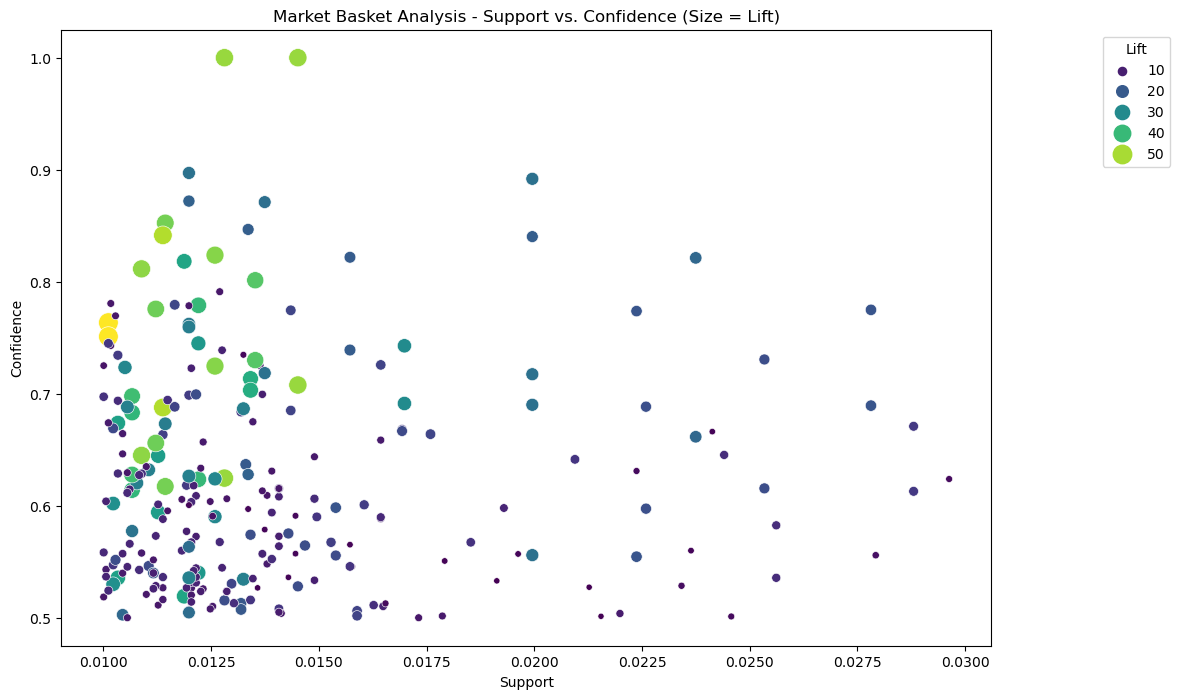

In [107]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Market Basket Analysis - Support vs. Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [77]:
pip install --upgrade numpy

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/da/3c/3ff05c2855eee52588f489a4e607e4a61699a0742aa03ccf641c77f9eb0a/numpy-1.26.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.2 kB 108.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.2 kB 131.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 201.8 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 191.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB 991.0 kB/s eta 0:00:16
   --------------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [78]:
import plotly.express as px

In [79]:
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

In [80]:
fig = px.scatter(rules, x="support", y="confidence", size="lift",
                 color="lift", hover_name="consequents",
                 title='Market Basket Analysis - Support vs. Confidence',
                 labels={'support': 'Support', 'confidence': 'Confidence'})

C:\Users\Admin\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Admin\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



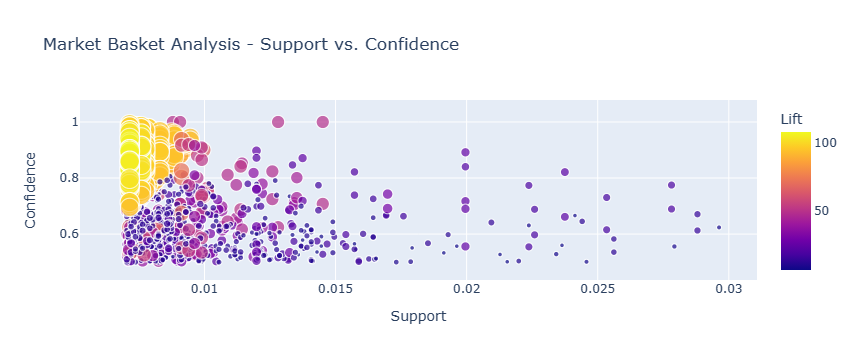

In [83]:
fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    coloraxis_colorbar_title='Lift',
    showlegend=True)
fig.show()

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [85]:
G = nx.DiGraph()

In [86]:
for idx, row in rules.iterrows():
    G.add_node(tuple(row['antecedents']), color='skyblue')
    G.add_node(tuple(row['consequents']), color='orange')
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['support'])

In [113]:
pos = nx.spring_layout(G)

In [114]:
edge_x = []
edge_y = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

In [115]:
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
)

In [116]:
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

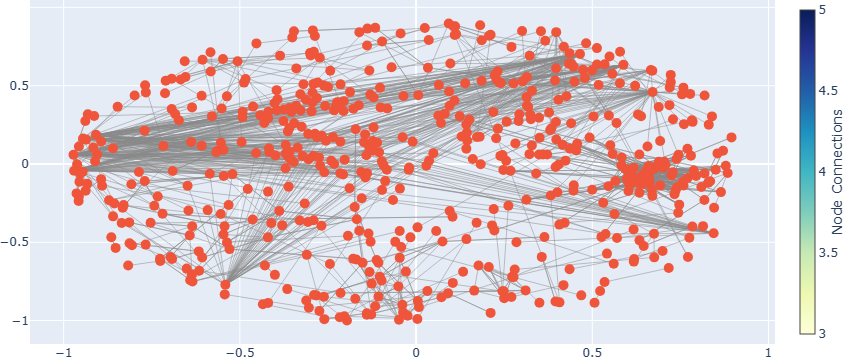

In [117]:
fig.show()

In [109]:
rules['rule'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)

In [110]:
fig = px.sunburst(rules, path=['rule'], values='lift', 
                  title='Market Basket Analysis - Sunburst Chart',
                  color='support', color_continuous_scale='YlGnBu')

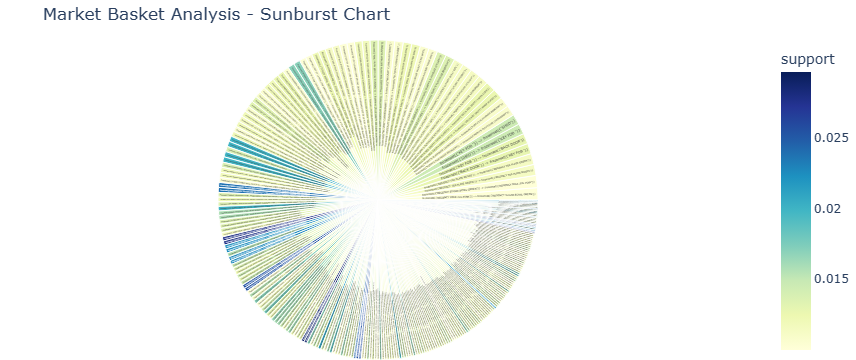

In [111]:
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
)
fig.show()